In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## importing the dataset


In [2]:
penguins = pd.read_csv("/Users/rishangprashnani/Library/Mobile Documents/com~apple~CloudDocs/Class work/Machine learning /coding assignment 1/datasets/penguins.csv")

# Main Statistics and information about the wine quality dataset

***

## Top rows of the dataframe (general idea of the dataframe)

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Number of rows and columns (shape)

In [4]:
print("No. of rows and columns", penguins.shape)

No. of rows and columns (344, 8)


### Name of all the columns 

In [5]:
print(penguins.columns.values)

['species' 'island' 'bill_length_mm' 'bill_depth_mm' 'flipper_length_mm'
 'body_mass_g' 'sex' 'year']


### Sex is our output value (y-value)**

### Rest are the attributes/features  (x-value)**

### Size of the dataframe ( no. of elements)

In [6]:
penguins.size

2752

### Main Statistics

In [7]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### A concise summary of a DataFrame

In [8]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


## Convert string to categorical type

In [9]:
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')
penguins['species'] = penguins['species'].astype('category')
penguins['year'] = penguins['year'].astype('category')
penguins.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                 category
dtype: object

## Null values 

In [10]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

#### we will mode function to find the most frequent value (rejected method)

penguins['bill_length_mm'].fillna( penguins['bill_length_mm'].mode()[0] ,inplace=True)
penguins['bill_depth_mm'].fillna( penguins['bill_depth_mm'].mode()[0] ,inplace=True)
penguins['flipper_length_mm'].fillna( penguins['flipper_length_mm'].mode()[0] ,inplace=True)
penguins['body_mass_g'].fillna( penguins['body_mass_g'].mode()[0] ,inplace=True)
penguins['sex'].fillna( penguins['sex'].mode()[0] ,inplace=True)

### filling null values with mean of values before and after. 
### filling null values of target variable with most frequent

In [11]:
num_rows = penguins['bill_length_mm'].shape
for i in range(num_rows[0]):
    if penguins['bill_length_mm'].isna().iloc[i] == True:
        penguins['bill_length_mm'].iloc[i] = (penguins['bill_length_mm'].iloc[i-1] + penguins['bill_length_mm'].iloc[i+1]) / 2

for i in range(num_rows[0]):
    if penguins['bill_depth_mm'].isna().iloc[i] == True:
        penguins['bill_depth_mm'].iloc[i] = (penguins['bill_depth_mm'].iloc[i-1] + penguins['bill_depth_mm'].iloc[i+1]) / 2

for i in range(num_rows[0]):
    if penguins['flipper_length_mm'].isna().iloc[i] == True:
        penguins['flipper_length_mm'].iloc[i] = (penguins['flipper_length_mm'].iloc[i-1] + penguins['flipper_length_mm'].iloc[i+1]) / 2

for i in range(num_rows[0]):
    if penguins['body_mass_g'].isna().iloc[i] == True:
        penguins['body_mass_g'].iloc[i] = (penguins['body_mass_g'].iloc[i-1] + penguins['body_mass_g'].iloc[i+1]) / 2

for i in range(num_rows[0]):
    if penguins['sex'].isna().iloc[i] == True:
        penguins['sex'].iloc[i] = penguins['sex'].value_counts().idxmax()
     


/var/folders/ff/y9m6qnj92x5dhd35k6lp3k040000gn/T/ipykernel_6302/1992638768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins['bill_length_mm'].iloc[i] = (penguins['bill_length_mm'].iloc[i-1] + penguins['bill_length_mm'].iloc[i+1]) / 2
/var/folders/ff/y9m6qnj92x5dhd35k6lp3k040000gn/T/ipykernel_6302/1992638768.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins['bill_depth_mm'].iloc[i] = (penguins['bill_depth_mm'].iloc[i-1] + penguins['bill_depth_mm'].iloc[i+1]) / 2
/var/folders/ff/y9m6qnj92x5dhd35k6lp3k040000gn/T/ipykernel_6302/1992638768.py:12: SettingWithCopyWarning: 
A value is trying to be set on

In [12]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## Normalizing non-categorical features

In [13]:
penguins['flipper_length_mm'] = (penguins['flipper_length_mm'] - penguins['flipper_length_mm'].min()) / (penguins['flipper_length_mm'].max() - penguins['flipper_length_mm'].min())
penguins['body_mass_g'] = (penguins['body_mass_g'] - penguins['body_mass_g'].min()) / (penguins['body_mass_g'].max() - penguins['body_mass_g'].min())
penguins['bill_depth_mm'] = (penguins['bill_depth_mm'] - penguins['bill_depth_mm'].min()) / (penguins['bill_depth_mm'].max() - penguins['bill_depth_mm'].min())
penguins['bill_length_mm'] = (penguins['bill_length_mm'] - penguins['bill_length_mm'].min()) / (penguins['bill_length_mm'].max() - penguins['bill_length_mm'].min())     


In [14]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,male,2007
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,female,2007
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,female,2007
3,Adelie,Torgersen,0.232727,0.660714,0.372881,0.180556,male,2007
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,female,2007


In [15]:
penguins['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

## Dataset Creation

In [16]:
Y = (penguins['sex']=="male").values.astype(np.float32)
np.random.seed(14)
Y = np.array(Y)    
np.random.shuffle(Y)     #shuffling the dataset
print("shape of actual values of dataset", Y.shape)

shape of actual values of dataset (344,)


In [17]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [18]:
Y

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0.

### converting categorical values to one hot encoder using pd.get_dummies

In [19]:
X = penguins.drop(['sex'], axis=1)

X = pd.get_dummies(X, columns=['island', 'species', 'year'], dtype=float)

X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,year_2007,year_2008,year_2009
0,0.254545,0.666667,0.152542,0.291667,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.232727,0.660714,0.372881,0.180556,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.167273,0.738095,0.355932,0.208333,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
X = np.array(X)
np.random.seed(14)
np.random.shuffle(X)  #shuffling the dataset

print("shape of input values of dataset", X.shape)

shape of input values of dataset (344, 13)


In [21]:
X[200]

array([0.25090909, 0.47619048, 0.3220339 , 0.09722222, 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        ])

### train and test data ( 80:20 split)

In [22]:
x_train , y_train = X[:int(len(Y)*0.8)] , Y[:int(len(Y)*0.8)]

x_test, y_test = X[int(len(Y)*0.8):] , Y[int(len(Y)*0.8):]

In [23]:
print("Shape of training data set", x_train.shape, 'and', y_train.shape)

Shape of training data set (275, 13) and (275,)


In [24]:
print("Shape of test dataset", x_test.shape, 'and', y_test.shape)

Shape of test dataset (69, 13) and (69,)


# Logistic regression

In [25]:


class LogitRegression():
    
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs

    def fit(self, x_tr, y_tr):
        
        loss = []
        
        #initializing weights with random values between 0 and 1
        np.random.seed(14)
        self.opt_w = np.random.uniform(0, 1, x_tr.shape[1])    

        for epoch in range(self.epochs):
            #y-predicted values with the initial w, changing after every iteration
            y_pred = self.sigmoid(np.dot(x_tr, self.opt_w))
            
            #calculating the optmial w
            self.opt_w = self.opt_w - self.gradient_descent(y_tr, y_pred, x_tr)
            
            #calculating the loss
            l = self.cost(y_tr, y_pred)

            loss.append(l)
            
        return loss, self.opt_w

            
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    

    def cost(self, y_tr, y_hat):
        return (-y_tr * np.log(y_hat) - (1 - y_tr) * np.log(1 - y_hat)).mean()
    

    def gradient_descent(self, y_tr, y_hat, x_tr):
        return self.lr * np.dot(x_tr.T, y_hat - y_tr) / len(y_tr)
    

    def predict(self, x_tr):
        y_pred = self.sigmoid(np.dot(x_tr, self.opt_w))
        
        preds = [1 if p>=0.5 else 0 for p in y_pred]
        return preds
    

    def accuracy(self, x_te, y_te):
        y = self.predict(x_te)
        preds = np.sum(y == y_te)
        return preds / len(y_te)

In [76]:

model = LogitRegression(lr=0.000001, epochs=100000)
loss, weight = model.fit(x_train, y_train)

model.accuracy(x_test, y_test)

0.5652173913043478

In [77]:
len(loss)

100000

In [78]:
weight

array([ 0.49948205,  0.75760975,  0.85341898, -0.00430554,  0.29094661,
        0.94241064,  0.50669585,  0.30099639,  0.52986033,  0.20747931,
        0.79442121,  0.3275084 ,  0.52529194])

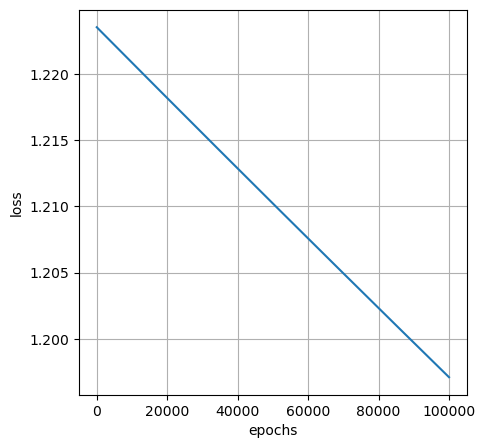

In [79]:
fig = plt.figure(1, figsize=(5, 5))
plt.plot(loss)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig("loss_3.png", dpi=300, format='png')

***

In [83]:

model = LogitRegression(lr=0.0001, epochs=10000)
loss, weight = model.fit(x_train, y_train)

model.accuracy(x_test, y_test)

0.5652173913043478

In [84]:
weight

array([ 0.38106171,  0.62938443,  0.71490486, -0.10306809,  0.13930247,
        0.81184046,  0.45299732,  0.15745751,  0.44859373,  0.09637194,
        0.69258514,  0.20676353,  0.41196003])

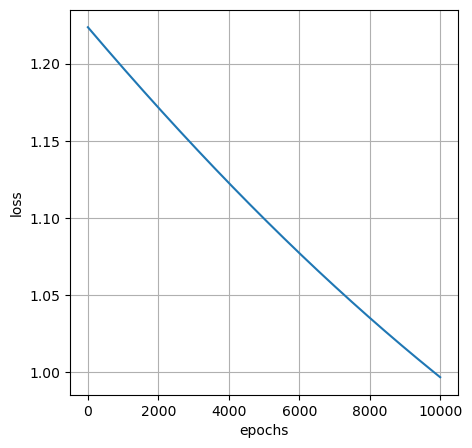

In [85]:
fig = plt.figure(1, figsize=(5, 5))
plt.plot(loss)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig("loss_3.png", dpi=300, format='png')

***

In [86]:

model = LogitRegression(lr=0.1, epochs=1000)
loss, weight = model.fit(x_train, y_train)

In [87]:
model.accuracy(x_test, y_test)


0.855072463768116

In [88]:
weight

array([ 1.14552216,  2.07573718,  0.99024283,  1.79944377, -1.02293999,
       -0.65896151, -0.63506599, -0.69106245, -1.23212117, -1.09550094,
       -0.61846091, -0.94139628, -0.84994184])

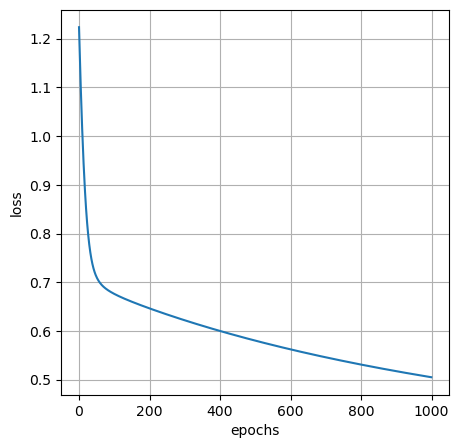

In [89]:
fig = plt.figure(1, figsize=(5, 5))
plt.plot(loss)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig("loss_3.png", dpi=300, format='png')

Refernces -   
https://www.harsh17.in/classification-logistic-regression-and-random-forest/  
https://github.com/DavoodSZ1993/CSE574-Intro-Machine-Learning/blob/main/    
https://stackoverflow.com/questions/56758567/pandas-get-one-hot-encodings-from-a-column-as-booleans  
https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places  